# ENTREGA PRÀCTICA 3 EQUACIONS DIFERENCIALS

## Víctor Ballester
## NIU: 1570866

In [79]:
reset()

In [80]:
# Primer de tot farem un canvi de notació. Al dipòsit amb l'àcid li direm A i al dipòsit amb la base, B.

##### 1 - Quanta aigua necessitem per eliminar 1.2 litres de B i 1 de A per minut?

In [81]:
# la proporció de residu per abocar-lo a l'exterior és 1%
prop=0.01

In [82]:
a=1.2;b=1
aigua_a=a/prop
aigua_b=b/prop

In [83]:
print('Necessiatarem un total de',aigua_a+aigua_b,'litres de aigua per minut.')

Necessiatarem un total de 220.000000000000 litres de aigua per minut.


##### 2 - Quin és el mínim d’aigua per minut que hem d’utilitzar perquè es compleixin les condicions fins aquest punt?

In [84]:
resist_ac=0.15 # resistència del tub que connecta els dipòsits A i C 
resist_bc=0.1 # resistència del tub que connecta els dipòsits B i C

In [85]:
# Per usar els mínims litres d'aigua necessàris cal que la barreja entre aigua i residu A surti exactament en 
# proporció del 15% mentre que la barreja entre aigua i residu B surti exactament en proporció del 10%. 

In [86]:
V=100 # volum dels dipòsits

In [87]:
var('t xa xb')

(t, xa, xb)

In [88]:
assume(xa>0) # quantitat d'aigua que afegirem al dipòsit A.
assume(xb>0) # quantitat d'aigua que afegirem al dipòsit B.

In [89]:
A=function('A')(t) # quantitat de residu A (en el dipòsit A) en el temps t 
B=function('B')(t) # quantitat de residu B (en el dipòsit B) en el temps t

In [90]:
edo_a=diff(A,t)==a*1 + xa*0 - (a+xa)*A/V
edo_b=diff(B,t)==b*1 + xb*0 - (b+xb)*B/V

In [91]:
# resolem les equacions diferencials
sol1=desolve_system([edo_a,edo_b],[A,B],ivar=t,ics=[0,0,0])
A1=sol1[0].rhs()
B1=sol1[1].rhs()
show(sol1)

[A(t) == -600*e^(-1/500*t*(5*xa + 6))/(5*xa + 6) + 600/(5*xa + 6),
 B(t) == -100*e^(-1/100*t*(xb + 1))/(xb + 1) + 100/(xb + 1)]

In [92]:
# vegem quanta aigua necessitem per aconseguir una concetració del 15% en àcid en el dipòsit A.
solve(A1/V==resist_ac,xa)[0].expand()

xa == -8*e^(-1/100*t*xa - 3/250*t) + 34/5

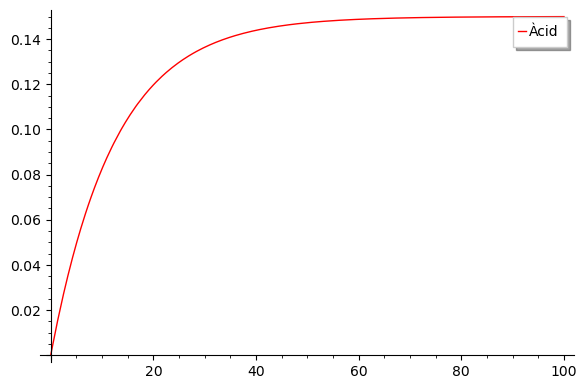

In [93]:
# observem que no hem pogut resoldre la equació aïllant xa però no obstant això podem deduir que haurem 
# d'afegir >= 34/5=6.8 litres d'aigua. Comprovem-ho:
pa=plot(A1.subs(xa=34/5)/V,0,100,color='red',legend_label='Àcid')
pa

In [94]:
# És a dir, afengint 6.8 litres d'aigua, aconseguriem (amb un temps infinit) que la concentració sigui del 15%.
# I, per tant, afegint-ne de menys aconseguirem això en un temps finit, que no pot ser.
limit(A1.subs(xa=34/5)/V,t=oo).n()

0.150000000000000

In [95]:
# vegem quanta aigua necessitem per aconseguir una concetració del 10% en base en el dipòsit B.
solve(B1/V==resist_bc,xb)[0].expand()

xb == -10*e^(-1/100*t*xb - 1/100*t) + 9

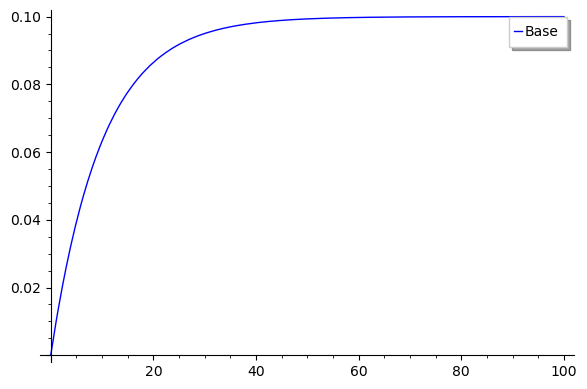

In [96]:
# observem que no hem pogut resoldre la equació aïllant xb però no obstant això podem deduir que haurem 
# d'afegir >9 litres d'aigua. Comprovem-ho:
pb=plot(B1.subs(xb=9)/V,0,100,legend_label='Base')
pb

In [97]:
# És a dir, afengint 9 litres d'aigua, aconseguriem (amb un temps infinit) que la concentració sigui del 10%.
# I, per tant, afegint-ne de menys aconseguirem això en un temps finit, que no pot ser.
limit(B1.subs(xb=9)/V,t=oo).n()

0.100000000000000

In [98]:
# Per, tant concloem que:
print('Necessiatarem un total de',(34/5+9).n(),'litres de aigua per minut per satisfer les restriccions.')

Necessiatarem un total de 15.8000000000000 litres de aigua per minut per satisfer les restriccions.


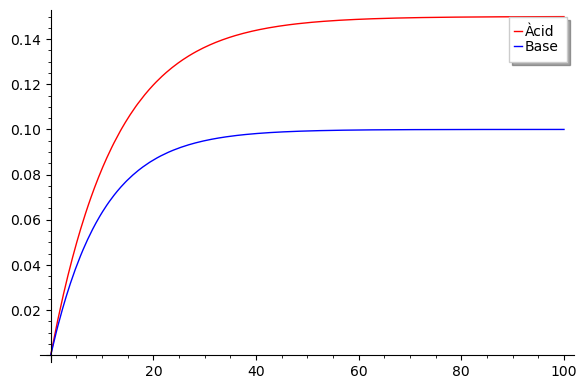

In [99]:
pa+pb

##### És suficient la quantitat d’aigua per minut que heu contestat en la pregunta anterior, si cada unitat de B anul·la 2 unitats de A? Si no ho és, quina és la necessària perquè es compleixin les condicions al llarg termini?

In [100]:
# tenim que si 1 unitat de B anul·la 2 de A, aleshores 1 unitat de A anul·la 0.5 unitats de B. Equivalentment, 1
# litre de A anul·la 0.5 litres de B.
# Per tant, si tenim 'a' litres de A, s'anul·laran 0.5*a litres de B.

In [101]:
Ca=function('Ca')(t) # quantitat de residu A (en el dipòsit C) en el temps t 
Cb=function('Cb')(t) # quantitat de residu B (en el dipòsit C) en el temps t

In [102]:
edo_ca=diff(Ca,t)==(a+xa)*A1/V + (b+xb)*0    - (a+xa+b+xb)*Ca/V -   2*(b+xb)*B1/V # l'últim terme es deu al fet que
# 1 unitat de B anul·la 2 unitats de A.
edo_cb=diff(Cb,t)==(a+xa)*0    + (b+xb)*B1/V - (a+xa+b+xb)*Cb/V - 0.5*(a+xa)*A1/V # l'últim terme es deu al fet que
# 1 unitat de A anul·la 0.5 unitats de B.

In [103]:
# resolem les equacions diferencials
sol2=desolve_system([edo_ca.subs(xa=6.8,xb=9),edo_cb.subs(xa=6.8,xb=9)],[Ca,Cb],ivar=t,ics=[0,0,0])
Ca1=sol2[0].rhs()
Cb1=sol2[1].rhs()
show(sol2)

[Ca(t) == -12*e^(-2/25*t) + 25*e^(-1/10*t) - 77/9*e^(-9/50*t) - 40/9,
 Cb(t) == 6*e^(-2/25*t) - 25/2*e^(-1/10*t) + 77/18*e^(-9/50*t) + 20/9]

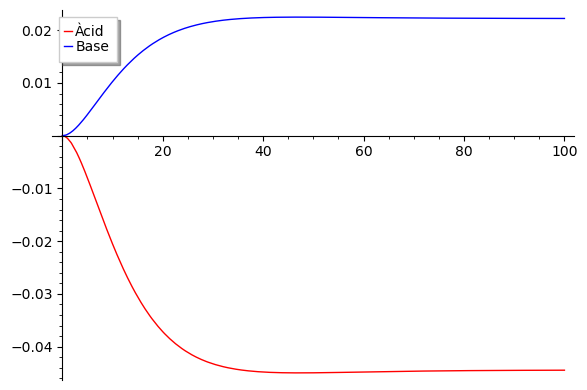

In [104]:
plot(Ca1/V,0,100,color='red',legend_label='Àcid')+plot(Cb1/V,0,100,legend_label='Base')

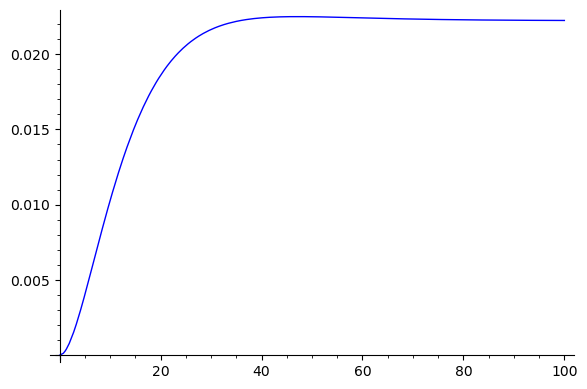

In [105]:
# Observem en la gràfica anterior que obtenim concentracions negatives d'àcid. Això es deu al fet que en aquell 
# moment tot l'àcid s'anul·la amb una part de la base. Per tant, de fet, la funció que ens interessa (i ens 
# interessarà més endavant) és el màxim entre aquestes dues, és a dir, en aquest cas, max(Ca1/V,Cb1/V).
plot(max_symbolic(Ca1/V,Cb1/V),0,100)

In [106]:
# Observem clarament en el gràfic que se sobrepassa la concetració de base de l'1%. Per tant, la quantitat d'aigua
# resposta a l'apartat anterior no és suficient.
limit(Cb1/V,t=oo).n()

0.0222222222222222

In [107]:
# Calculem doncs quins valors poden prendre xa i xb per tal de satisfer les resticcions.

In [108]:
assume(xa>0,xb>0) # les quantitats han de ser positives, perquè mesuren la quantitat d'aigua afegida (i no podem 
# afegir aigua negativa!) 

In [109]:
# solucions de les edos en funció de t, xa i xb
sol3=desolve_system([edo_ca,edo_cb],[Ca,Cb],ivar=t,ics=[0,0,0])
show(sol3)
Ca2=sol3[0].rhs()
Cb2=sol3[1].rhs()

[Ca(t) == 40*(75*xa^2 - 125*xb^2 + 180*xa - 250*xb - 17)*e^(-1/500*t*(5*xa + 5*xb + 11))/(5*(5*xa + 6)*xb^2 + 25*xa^2 + (25*xa^2 + 110*xa + 96)*xb + 85*xa + 66) - 120*e^(-1/500*t*(5*xa + 6))/(xb + 1) + 1000*e^(-1/100*t*(xb + 1))/(5*xa + 6) - 400/(5*xa + 5*xb + 11),
 Cb(t) == -20*(75*xa^2 - 125*xb^2 + 180*xa - 250*xb - 17)*e^(-1/500*t*(5*xa + 5*xb + 11))/(5*(5*xa + 6)*xb^2 + 25*xa^2 + (25*xa^2 + 110*xa + 96)*xb + 85*xa + 66) + 60*e^(-1/500*t*(5*xa + 6))/(xb + 1) - 500*e^(-1/100*t*(xb + 1))/(5*xa + 6) + 200/(5*xa + 5*xb + 11)]

In [110]:
# Fixem-nos que, com ens ho mostra el gràfic anterior, sempre sobrarà base pel següent motiu:
# Introduïm b=1 litres de base per minut i a=1.2 litres d'àcid per minut. Per tant, com que un 1 litre de A 
# anul·la 0.5 litres de B, tindrem que 1.2 litres de A anul·laran 1.2*0.5=0.6<1 litres de B. Per tant, sobrarà
# residu B (en el llarg termini!). Així doncs, únicament ens hem de preocupar (ara per ara) del residu B.

In [111]:
# Volem que en el llarg termini la proporció de residu B en el dipòsit C sigui inferior o igual al 1%.
Cb_limit=limit(Cb2,t=oo).simplify_full()
Cb_limit

200/(5*xa + 5*xb + 11)

In [112]:
var('y') # creem una nova variable (y = xa+xb) que sigui la quantitat total d'aigua que cal afegir.
# trobem el valor de y que fa que Cb_limit=0.01
s=solve(Cb_limit.subs(xa=y-xb)/V==0.01,y)
s

[y == (189/5)]

In [113]:
# En el llarg termini caldrà doncs subministrar una quantitat mínima de 189/5=37.8 litres d'aigua per tal que la  
# base sorti del dipòsit C amb una concetració menor o igual al 1%.
aigua_llarg_ter=s[0].rhs()
aigua_llarg_ter

189/5

In [114]:
# Per tant, el valor trobat anteriorment (15.8) no és suficient.

##### Si volem que en cap moment s'incompleixi la condició del 1%, quina quantitat d'aigua per minut necessitem?

In [115]:
# funcions necessàries per el càlcul dels gràfics.

# retorna totes les arrels de la funció f en l'interval [a,b] amb un error menor que "eps". (Referència: 
# https://ask.sagemath.org/question/7823/numerically-find-all-roots-in-an-interval/)
def find_all_roots(f, a, b, eps):
    roots = []
    intervals_to_check = [(a,b)]
    while intervals_to_check:
        start, end = intervals_to_check.pop()
        try:
            root = find_root(f, start, end)
        except RuntimeError:
            continue
        if root in roots:
            continue
        if abs(f(t=root)) < 1:
            roots.append(root)
        intervals_to_check.extend([(start, root-eps), (root+eps, end)])
    roots.sort()
    return roots

# Imprimeix el màxim de dues funcions pintades en colors diferents.
def plot_max(f,g): # f representa la funció 'àcid' i g, la funció 'base'
    eps=0.01
    H=[]
    if f(t=eps) > g(t=eps):
        H.append((f,'red','Àcid'))
    else:
        H.append((g,'blue','Base'))
    roots=find_all_roots(f,0.01,100,0.01)
    for i in range(len(roots)):
        if f(t=roots[i]+eps) > g(t=roots[i]+eps):
            H.append((f,'red','Àcid'))
        else:
            H.append((g,'blue','Base'))
    roots.insert(0,0) # afegir el 0 al principi de la lista
    roots.append(100) # afegir el 100 al final de la lista
    return sum(plot(H[i][0],roots[i],roots[i+1],color=H[i][1],legend_label=H[i][2]) for i in range(len(H)))

In [116]:
# A continuació mostrem 4 possibles distribucions d'aigua, segons si afegim i=4,10,15,22,30 < aigua_llarg_ter
# litres d'aigua al dipòsit B:
def plot_acid_base(i):
    pa=Ca2.subs(xa=aigua_llarg_ter-i,xb=i)/V
    pb=Cb2.subs(xa=aigua_llarg_ter-i,xb=i)/V
    return plot_max(pa,pb)

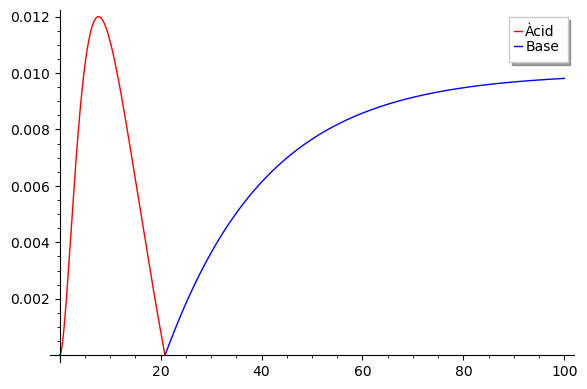

In [117]:
plot_acid_base(4)

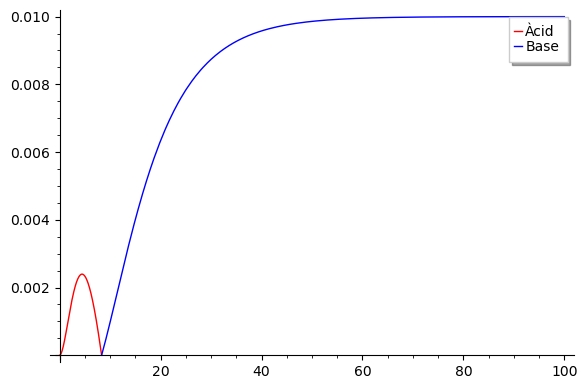

In [118]:
plot_acid_base(10)

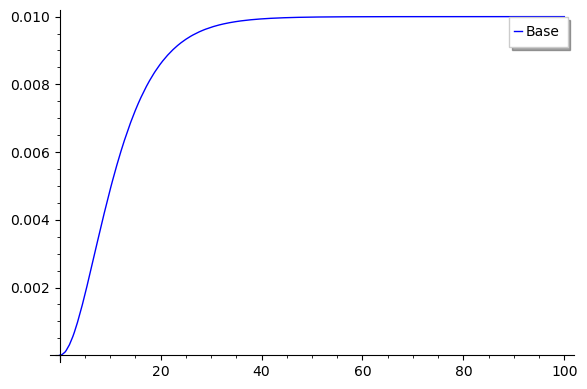

In [119]:
plot_acid_base(15)

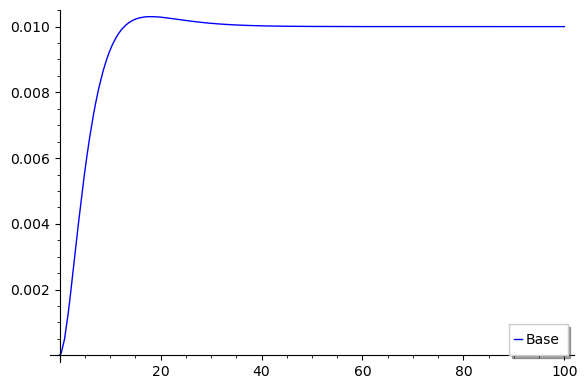

In [120]:
plot_acid_base(22)

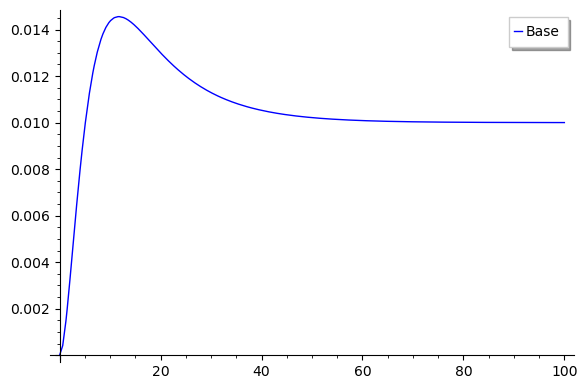

In [121]:
plot_acid_base(30)

In [122]:
# Observem que totes en el llarg termini acaben arribant a una concentració de base del 1%. No obstant això, hi
# ha distribucions que durant un temps superen els límits estalerts! Tant d'àcid com de base!
# Calculem ara l'interval (x,y) contingut a (0,aigua_llarg_ter) tal que si xb --la quantitat d'aigua afegida al 
# dipòsit B-- pertany a (x,y), aleshores poguem assegurar que en CAP moment les concentracions en àcid o base
# superin l'1% establert.

In [123]:
# Calulem primer el valor de x. Fixem-nos que aquest valor el trobarem quan la funció àcid assoleixi un màxim 
# en un punt tal que la funció en aquest punt valgui 0.01. Per continuïtat, observant les imatges deduïm que x ha
# d'estar entre 4 i 10.
# Ho resoldrem numèricament.

In [124]:
Ca3=Ca2.subs(xa=aigua_llarg_ter-xb) # deixem la funció únicament en dues variables: el temps 't' i 'xb'.
Cb3=Cb2.subs(xa=aigua_llarg_ter-xb) # deixem la funció únicament en dues variables: el temps 't' i 'xb'.

In [125]:
# Fem una bisecció per a trobar el punt x tal que s'assoleix un màxim, que val 0.01, en un cert temps quan xb=x.
def biseccio_xb(f,a,b,err): # f representarà la funció àcid. [a,b] l'interval del temps on fem l'estudi i 
    # determinarem x amb error menor que "err"
    xb1=4;xb2=10 # extrems de l'interval on sabem segur que ha de estar el x que busquem
    aprox=xb1
    maxim=find_local_maximum(f.subs(xb=aprox)/100,a,b)[0]
    while abs(maxim-0.01)>err:
        if maxim-0.01>0:
            aprox_nou=((aprox+xb2)/2).n()
            maxim=find_local_maximum(f.subs(xb=aprox_nou)/100,a,b)[0]
            xb1=aprox
            aprox=aprox_nou
        else:
            aprox_nou=((xb1+aprox)/2).n()
            maxim=find_local_maximum(f.subs(xb=aprox_nou)/100,a,b)[0]
            xb2=aprox
            aprox=aprox_nou
    return aprox

In [126]:
x=biseccio_xb(Ca3,0.1,40,0.00000000001)
x

4.97131920233369

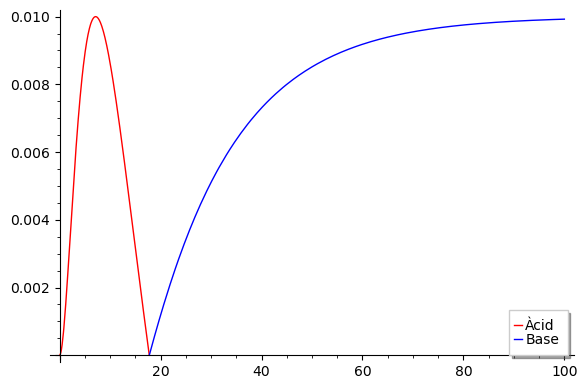

In [127]:
# Comprovació gràfica que la solució sigui correcta:
plot_acid_base(x)

In [128]:
# Calulem ara el valor de y. Fixem-nos detalladament en els 5 gràfics anteriors que per a valors de xb majors 
# o iguals a 22 ja observem un màxim en la funció de color blau. Però per valors menors o iguals a 15, la funció de
# color blau és estrictament creixent en l'interval on està definida en el gràfic. Per tant, per continuïtat hi 
# haurà un punt tal que per sobre d'aquest punt, la funció tindrà un maxim i per tant, tendrià a 0.01 per sobre (és
# a dir, superarà els límits permesos). Així doncs, busquem el suprem y dels punts y1 tals que si fem xb=y1, la 
# funció que regula la quantitat de base és estrictament creixent.
# Ho resoldrem numèricament.

In [129]:
def positive_at_infinity(f,infinit): # retorna True si f és positiva en un valor t = infinit (a la pràctica
    # "infinit" serà un valor molt gran)
    return bool(f(t=infinit)>0) 

# Fem de nou una bisecció per a trobar el punt y en qüestió
def biseccio_xb2(f,maxiter):# f representarà la funció base i "maxiter" el nombre màxim d'iteracions que fa el 
    # programa (per tal que no se saturi)
    i=0
    xb1=15;xb2=22 # extrems de l'interval on sabem segur que ha de estar el y que busquem
    aprox=xb1
    valor=positive_at_infinity(f.subs(xb=aprox),1e15)
    while i<maxiter:
        if valor==False:
            aprox_nou=((aprox+xb2)/2).n()
            valor=positive_at_infinity(f.subs(xb=aprox_nou),1e15)
            xb1=aprox
            aprox=aprox_nou
        else:
            aprox_nou=((xb1+aprox)/2).n()
            valor=positive_at_infinity(f.subs(xb=aprox_nou),1e15)
            xb2=aprox
            aprox=aprox_nou
        i=i+1
    return aprox

In [130]:
y=biseccio_xb2(Cb3-1,200)
y

19.0000000000000

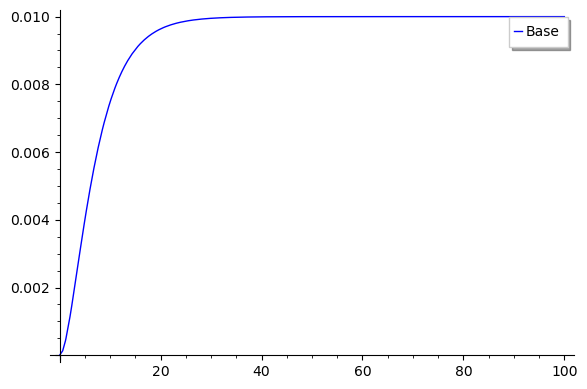

In [131]:
# Comprovació gràfica que la solució sigui correcta:
plot_acid_base(y)

In [132]:
# Així doncs, concloem que:
print('Si no volem passar-nos en CAP moment dels límits establerts, haurem de afegir una quantitat de aigua xb al dipòsit B continguda en el interval',[x,y],'\b. I per tant, haurem de afegir una quantitat de aigua xa al dipòsit A continguda en el interval',[aigua_llarg_ter-y,aigua_llarg_ter-x],'i de manera que xa + xb =',aigua_llarg_ter.n(),'\b.')  

Si no volem passar-nos en CAP moment dels límits establerts, haurem de afegir una quantitat de aigua xb al dipòsit B continguda en el interval [4.97131920233369, 19.0000000000000] . I per tant, haurem de afegir una quantitat de aigua xa al dipòsit A continguda en el interval [18.8000000000000, 32.8286807976663] i de manera que xa + xb = 37.8000000000000 .


In [133]:
# Per exemple, dues possibles distribucions serien aquestes:

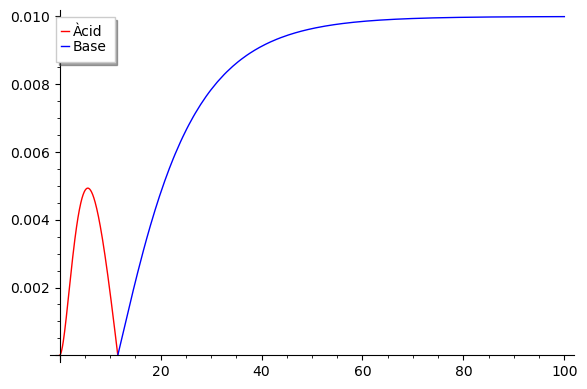

In [134]:
# xa=37.8-8=29.8
# xb=8
plot_acid_base(8)

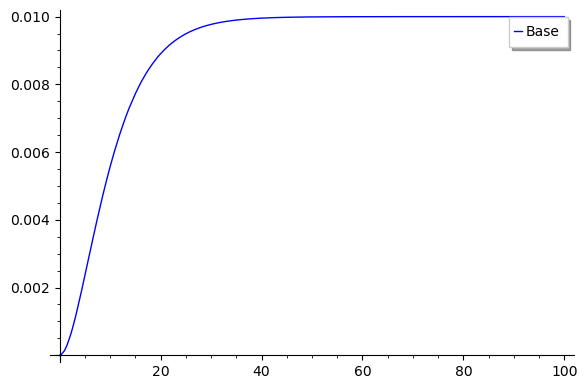

In [135]:
# xa=37.8-16=21.8
# xb=16
plot_acid_base(16)

##### I si no volem augmentar la quantitat d'aigua?

In [136]:
# Podríem pensar que si no es vol augmentar l'aigua necessària, potser podríem solucionar-ho utilitzant un dipòsit
# C de més capacitat que 100 litres. 
# Estudiem quin seria el volum mínim per tal de no necessitar un augment de la quantitat d'aigua.

In [137]:
var('V2') # nou volum de C
assume(V2>0)

In [138]:
# Recuperem les equacions de la concentració de àcid i base en els seus respectius diòsits en funció del temps
A1

-600*e^(-1/500*t*(5*xa + 6))/(5*xa + 6) + 600/(5*xa + 6)

In [139]:
B1

-100*e^(-1/100*t*(xb + 1))/(xb + 1) + 100/(xb + 1)

In [140]:
# Recordem també que els mínims valors d'aigua que hem d'afegir per tal de satisfer les restriccions dels tubs són
# xa=34/5 i xb=9.

In [141]:
C2a=function('C2a')(t) # quantitat de residu A (en el dipòsit C) en el temps t 
C2b=function('C2b')(t) # quantitat de residu B (en el dipòsit C) en el temps t

In [142]:
edo_c2a=diff(C2a,t)==(a+xa)*A1/V + (b+xb)*0    - (a+xa+b+xb)*C2a/V2 -   2*(b+xb)*B1/V # l'últim terme es deu al fet
# que 1 unitat de B anul·la 2 unitats de A.
edo_c2b=diff(C2b,t)==(a+xa)*0    + (b+xb)*B1/V - (a+xa+b+xb)*C2b/V2 - 0.5*(a+xa)*A1/V # l'últim terme es deu al fet
# que 1 unitat de A anul·la 0.5 unitats de A.

In [143]:
# resolem les equacions diferencials
sol4=desolve_system([edo_c2a.subs(xa=6.8,xb=9),edo_c2b.subs(xa=6.8,xb=9)],[C2a,C2b],ivar=t,ics=[0,0,0])
C2a1=sol4[0].rhs()
C2b1=sol4[1].rhs()
show(sol4)

[C2a(t) == -2/45*V2 + 15*V2*e^(-2/25*t)/(V2 - 225) - 20*V2*e^(-1/10*t)/(V2 - 180) + 1/45*(2*V2^4 - 585*V2^3)*e^(-18*t/V2)/((V2^2 - 405*V2 + 40500)*V2),
 C2b(t) == 1/45*V2 - 15/2*V2*e^(-2/25*t)/(V2 - 225) + 10*V2*e^(-1/10*t)/(V2 - 180) - 1/90*(2*V2^4 - 585*V2^3)*e^(-18*t/V2)/((V2^2 - 405*V2 + 40500)*V2)]

In [144]:
L=limit(C2b1/V2,t=oo).n()
L

0.0222222222222222

que és el mateix valor que ens sortia amb $V=100$.

In [145]:
# Per tant, d'aquesta manera observem que la quantitat final de base en el recipient C no depèn de V2 i llavors
# sempre serà la mateixa independentment del volum de C

In [146]:
# Una altra manera podria ser afegir una certa quantitat d'àcid diretament al dipòsit C, a part de l'afegida 
# directament al dipòsit A (aquí estem suposant que l'empresa química es pot permetre fabricar més residu àcid
# del que fabricava inicialment (a)). Així doncs, suposem ara que afegim una quantitat de litres d'àcid per 
# minut "aa" directament al dipòst C. Ens interessa saber quina és la quantitat mínima per tal de satisfer les 
# condicions del 1% i sense augmentar més el consum d'aigua.

In [147]:
var('aa')
assume(aa>0)

In [148]:
C2a=function('C2a')(t) # quantitat de residu A (en el dipòsit C) en el temps t 
C2b=function('C2b')(t) # quantitat de residu B (en el dipòsit C) en el temps t

In [149]:
# Noves equacions diferencials
edo_c2a=diff(C2a,t)==(a+xa)*A1/V + aa*1 + (b+xb)*0    - (a+xa+b+xb+aa)*C2a/V -   2*(b+xb)*B1/V
edo_c2b=diff(C2b,t)==(a+xa)*0    + aa*0 + (b+xb)*B1/V - (a+xa+b+xb+aa)*C2b/V - 0.5*((a+xa)*A1/V+aa*1)

In [150]:
# resolem les equacions diferencials
sol5=desolve_system([edo_c2a.subs(xa=6.8,xb=9),edo_c2b.subs(xa=6.8,xb=9)],[C2a,C2b],ivar=t,ics=[0,0,0])
C2a1=sol5[0].rhs()
C2b1=sol5[1].rhs()
show(sol5)

[C2a(t) == -20*(5*aa^3 + 90*aa^2 + 452*aa + 616)*e^(-1/100*(aa + 18)*t)/(aa^3 + 36*aa^2 + 404*aa + 1440) + 20*(5*aa - 4)/(aa + 18) - 120*e^(-2/25*t)/(aa + 10) + 200*e^(-1/10*t)/(aa + 8),
 C2b(t) == 10*(5*aa^3 + 90*aa^2 + 452*aa + 616)*e^(-1/100*(aa + 18)*t)/(aa^3 + 36*aa^2 + 404*aa + 1440) - 10*(5*aa - 4)/(aa + 18) + 60*e^(-2/25*t)/(aa + 10) - 100*e^(-1/10*t)/(aa + 8)]

In [151]:
L=limit(C2b1/V,t=oo)
L

-1/2*aa/(aa + 18) + 2/5/(aa + 18)

In [152]:
# En interessaria que en l'infinit la concentració fos del 1%.
AA=solve(L==0.01,aa)[0].rhs()
AA

22/51

In [153]:
# Per tant, afegint 22/51=0.4314... litres per minut d'àcid directament al dipòsit C, obtindríem (en el llarg 
# termini) una concentració del 1%.
# Vegem-ho ara gràficament.

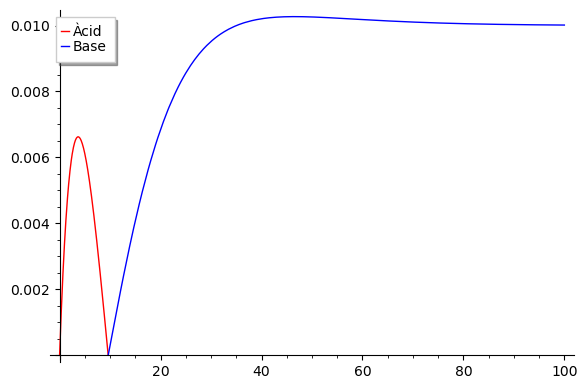

In [154]:
# Observem, gràficament, que en el llarg termini la proporció de base serà del 1%. I sense haver augmentat el 
# consum d'aigua.
plot_max((C2a1/V).subs(aa=AA),(C2b1/V).subs(aa=AA))

In [155]:
# Però fixem-nos que hi a moments en què ens passem del 1%
find_local_maximum((C2b1/V).subs(aa=AA),20,100) # la primera coordenada (que dona el valor del màxim de la funció)
# és major a 0.01.

(0.010269546900504778, 46.55146184795216)

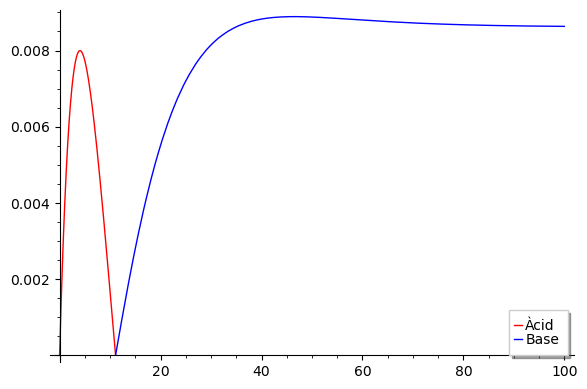

In [156]:
# En canvi si afegim una mica més d'acid ja no ens sobrepassem.
plot_max((C2a1/V).subs(aa=AA+0.05),(C2b1/V).subs(aa=AA+0.05))

In [157]:
find_local_maximum((C2b1/V).subs(aa=AA+0.05),20,100)

(0.008889767036420086, 46.48748113773295)

In [158]:
# Ens interessaria trobar doncs la mínima quantitat d'àcid que hem d'afegir al dipòsit C per tal que en cap moment
# sobrepassem la proporció de l'1%.
# De moment tenim una cota inferior (AA) i una cota superior (AA+0.05)

In [159]:
# Fem de nou una bisecció per a trobar el valor que busquem
def biseccio_aa(f,maxiter):# f representarà la funció base i "maxiter" el nombre màxim d'iteracions que fa el 
    # programa (per tal que no se saturi)
    i=0
    xb1=AA;xb2=AA+0.05 # extrems de l'interval on sabem segur que ha de estar el valor que busquem
    aprox=xb1
    valor=find_local_maximum((C2b1/V).subs(aa=aprox),20,100)[0]
    while i<maxiter:
        if valor>0.01:
            aprox_nou=((aprox+xb2)/2).n()
            valor=find_local_maximum((C2b1/V).subs(aa=aprox_nou),20,100)[0]
            xb1=aprox
            aprox=aprox_nou
        else:
            aprox_nou=((xb1+aprox)/2).n()
            valor=find_local_maximum((C2b1/V).subs(aa=aprox_nou),20,100)[0]
            xb2=aprox
            aprox=aprox_nou
        i=i+1
    return aprox

In [160]:
aa_min=biseccio_aa(C2b1/V,100)
aa_min

0.441119054130928

In [162]:
print("Per tant, si afegim",aa_min,"litres per minut d'àcid al dipòsit C, no ens sobrepassarem en cap moment de la proporció de base de l'1%. I no haurem afegit més aigua de l'afegida inicialment!")

Per tant, si afegim 0.441119054130928 litres per minut d'àcid al dipòsit C, no ens sobrepassarem en cap moment de la proporció de base de l'1%. I no haurem afegit més aigua de l'afegida inicialment!


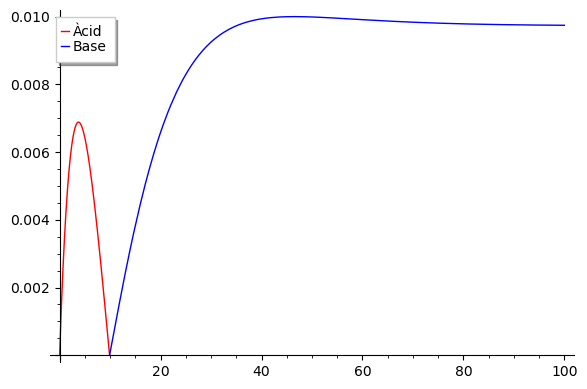

In [163]:
# Comprovació del valor trobat gràficament.
plot_max((C2a1/V).subs(aa=aa_min),(C2b1/V).subs(aa=aa_min))

In [164]:
# Comprovació del valor trobat numèricament.
find_local_maximum((C2b1/V).subs(aa=aa_min),20,100)

(0.01, 46.5389209778124)

In [165]:
# I en un temps molt llarg tampoc ens passarem.
limit((C2b1/V).subs(aa=aa_min),t=oo)

0.00973045466534961